In [72]:
%pip install ccxt
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\msnin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\msnin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [73]:
import ccxt
import math
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta
import datetime
import calendar

In [74]:
def fetch_historical_data(exchange, symbol, timeframe, since):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['date'] = df['timestamp'].dt.strftime('%m-%d-%y')
    df = df.tail(90) #used to select only the last 90 days of entries into the DF
    return df

In [75]:
#   api key stuff
api_key = 'Z6bH9gXJ7UllNhBuj0'
api_secret = 'gtajv8bMci1T3BIEmTMzgS4PQU5IECuFWqKz'
exchange = ccxt.bybit({'apiKey': api_key, 'secret': api_secret})

#   asset and timeframe
symbol = 'BTCUSDT'
timeframe = '5m'

In [82]:
# get today's date and subtract 90 days
today = datetime.datetime.utcnow()
day_90 = today - datetime.timedelta(days=90)
day_90_midnight = datetime.datetime(day_90.year, day_90.month, day_90.day, 0, 0, 0)
since = int(calendar.timegm(day_90_midnight.utctimetuple()) * 1000)

# Fetch historical dataa
limit = 12*24*90*5
historical_data = exchange.fetch_ohlcv(symbol, timeframe, since = since, limit = limit)

# Convert data to DataFrame
df = pd.DataFrame(historical_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Filter data for weekdays and weekends
weekdays_data = df[df['timestamp'].dt.weekday < 5]  # Monday to Friday
weekends_data = df[df['timestamp'].dt.weekday >= 5]  # Saturday and Sunday

print(weekdays_data)


              timestamp     open     high      low    close    volume
288 2023-10-02 00:00:00  27979.0  28044.3  27940.1  27961.6  2364.049
289 2023-10-02 00:05:00  27961.6  27981.6  27916.3  27930.0   922.151
290 2023-10-02 00:10:00  27930.0  27965.5  27921.9  27933.1   583.198
291 2023-10-02 00:15:00  27933.1  27950.0  27918.8  27944.9   362.972
292 2023-10-02 00:20:00  27944.9  27973.3  27889.0  27889.0   604.198
..                  ...      ...      ...      ...      ...       ...
995 2023-10-04 10:55:00  27510.1  27529.6  27509.3  27518.0   215.270
996 2023-10-04 11:00:00  27518.0  27527.2  27508.4  27520.7   316.042
997 2023-10-04 11:05:00  27520.7  27537.8  27520.7  27537.8   168.661
998 2023-10-04 11:10:00  27537.8  27544.1  27535.4  27537.6   144.903
999 2023-10-04 11:15:00  27537.6  27562.9  27537.6  27550.6   358.532

[712 rows x 6 columns]


In [91]:
#math.ceil(12*24*90/1000)
since_2 = since
for i in range(2):
    # Fetch 1000 data points
    limit = 1000
    historical_data = fetch_historical_data(exchange, symbol, since_2, limit)

    # Filter out rows with NaT values
    historical_data = historical_data.dropna(subset=['timestamp'])

    # Separate data into weekdays and weekends
    weekdays_data_iter = historical_data[historical_data['timestamp'].dt.weekday < 5]
    weekends_data_iter = historical_data[historical_data['timestamp'].dt.weekday >= 5]

    # Concatenate with the existing DataFrames
    weekdays_data = pd.concat([weekdays_data, weekdays_data_iter], ignore_index=True)
    weekends_data = pd.concat([weekends_data, weekends_data_iter], ignore_index=True)

    # Update 'since' for the next iteration
    if not historical_data.empty:
        since_2 = int(historical_data['timestamp'].max().timestamp() * 1000)
    print(since_2)
# Print the first 10 rows of weekends_data
print(weekdays_data)

1696118400000
1696118400000
              timestamp     open     high      low    close    volume date
0   2023-10-02 00:00:00  27979.0  28044.3  27940.1  27961.6  2364.049  NaN
1   2023-10-02 00:05:00  27961.6  27981.6  27916.3  27930.0   922.151  NaN
2   2023-10-02 00:10:00  27930.0  27965.5  27921.9  27933.1   583.198  NaN
3   2023-10-02 00:15:00  27933.1  27950.0  27918.8  27944.9   362.972  NaN
4   2023-10-02 00:20:00  27944.9  27973.3  27889.0  27889.0   604.198  NaN
..                  ...      ...      ...      ...      ...       ...  ...
707 2023-10-04 10:55:00  27510.1  27529.6  27509.3  27518.0   215.270  NaN
708 2023-10-04 11:00:00  27518.0  27527.2  27508.4  27520.7   316.042  NaN
709 2023-10-04 11:05:00  27520.7  27537.8  27520.7  27537.8   168.661  NaN
710 2023-10-04 11:10:00  27537.8  27544.1  27535.4  27537.6   144.903  NaN
711 2023-10-04 11:15:00  27537.6  27562.9  27537.6  27550.6   358.532  NaN

[712 rows x 7 columns]


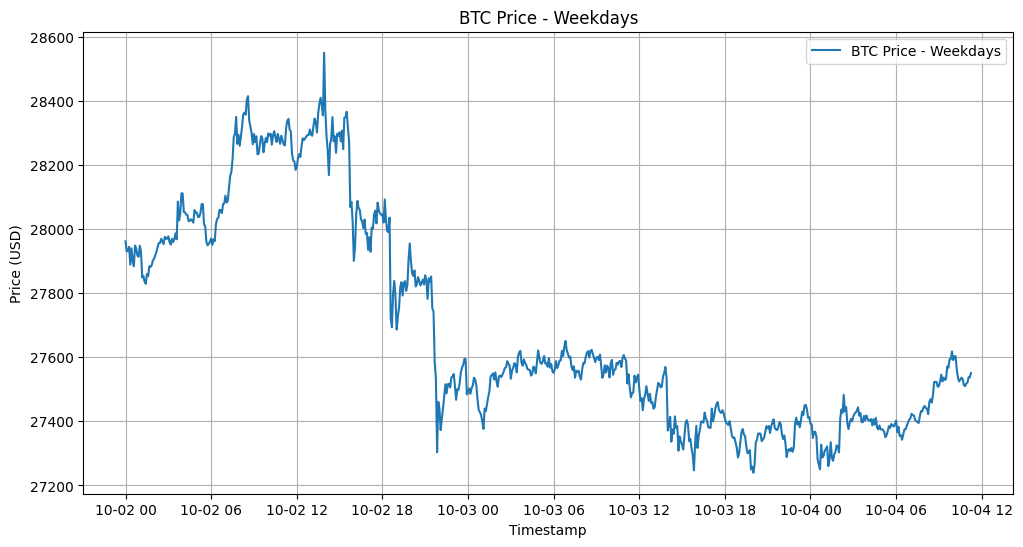

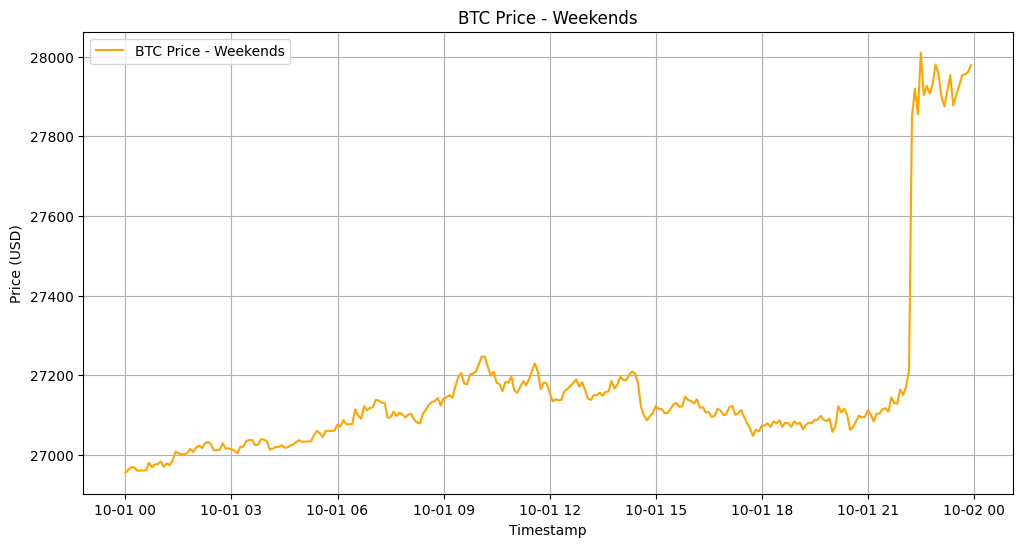

In [78]:
# Plot for weekdays
plt.figure(figsize=(12, 6))
plt.plot(weekdays_data['timestamp'], weekdays_data['close'], label='BTC Price - Weekdays')
plt.title('BTC Price - Weekdays')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for weekends
plt.figure(figsize=(12, 6))
plt.plot(weekends_data['timestamp'], weekends_data['close'], label='BTC Price - Weekends', color='orange')
plt.title('BTC Price - Weekends')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()